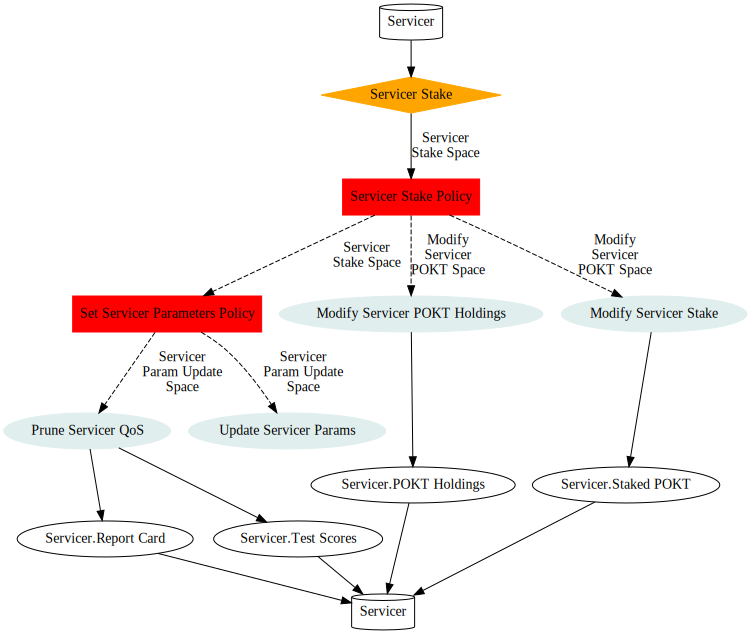

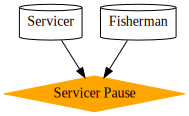

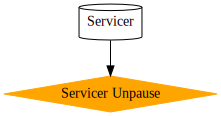

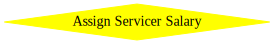

In [1]:
import os
import sys
sys.path.append("..")

from MSML.src import load_from_json, create_action_chains_graph, write_out_boundary_actions, write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full
from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
ms = load_from_json(deepcopy(math_spec_json))

for behavior in ["Servicer Stake", "Servicer Pause", "Servicer Unpause", "Assign Servicer Salary"]:
    display(create_action_chains_graph(ms, [behavior], behavior))

#write_basic_report_full(ms, "MSML/examples/Starter Repo/reports", "Basic Report")